In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
from sklearn.utils import check_random_state
from sklearn.datasets import  make_moons
sns.set_style("whitegrid")
plt.style.use('seaborn-colorblind')

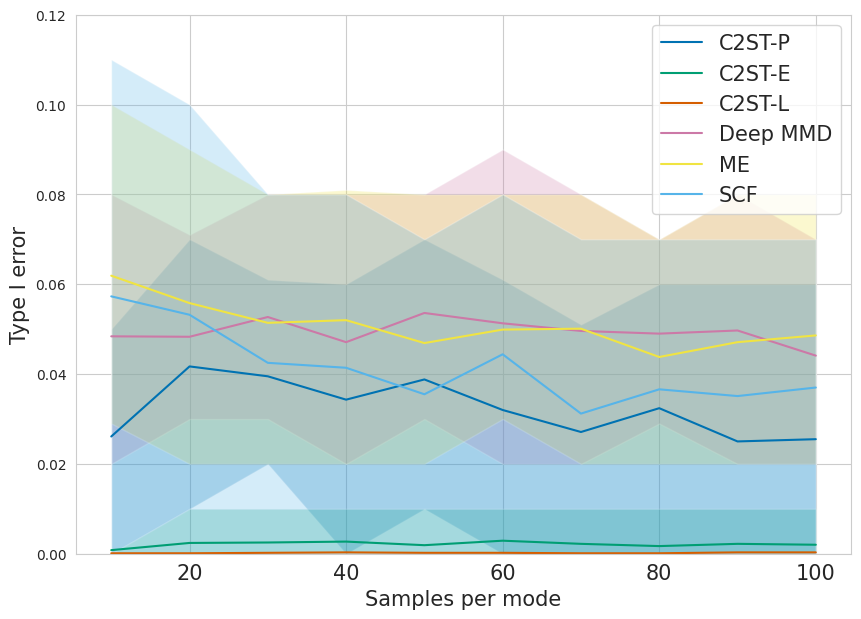

In [32]:
# blob
file = open("outputs/2022-09-06/13-37-04/powerBlob.pickle", "rb")
res = pickle.load(file)
file.close()

powerp, powere, powerl, powerm, powerme, powerscf = res

labels = ["C2ST-P", "C2ST-E", "C2ST-L", "Deep MMD", "ME", "SCF"]
n_list = list(range(10,110,10))

means = np.zeros((10, 6))
lows = np.zeros((10, 6))
highs = np.zeros((10, 6))

for i in range(6):
    means[:,i] = np.mean(res[i], axis=1)#np.quantile(res[i], 0.5,axis=1)
    lows[:,i] = np.quantile(res[i], 0.1, axis=1)#np.mean(res[i], axis=1)-np.std(res[i], axis=1)#np.quantile(res[i], 0.1, axis=1)
    highs[:,i] = np.quantile(res[i], 0.9, axis=1)#np.mean(res[i], axis=1)+np.std(res[i], axis=1)#np.quantile(res[i], 0.9, axis=1)

plt.figure(figsize=(10, 7))
for i in range(6):
    
    plt.fill_between(
        n_list, lows[:,i], highs[:,i], alpha=0.25
    )
    plt.plot(
        n_list, means[:,i], label=labels[i], 
    )
plt.legend()
#plt.yscale("log")
plt.ylim((0,0.12))
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel(r"Samples per mode",fontsize=15)
plt.ylabel(r"Type I error",fontsize=15)
#plt.title(r"$D=10, N=1000$",fontsize=15)
plt.savefig('type1_blob_sep_5.png', format='png', dpi=300)
plt.show()

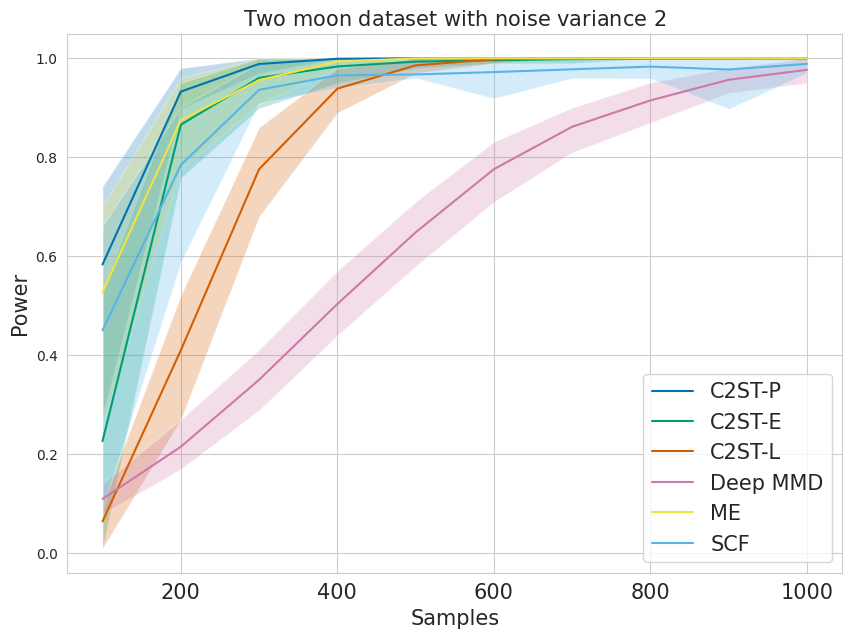

In [36]:
# two-moons
file = open("outputs/2022-09-06/13-51-22/powerBlob.pickle", "rb")
res = pickle.load(file)
file.close()

powerp, powere, powerl, powerm, powerme, powerscf = res

labels = ["C2ST-P", "C2ST-E", "C2ST-L", "Deep MMD", "ME", "SCF"]
n_list = list(range(100,1100,100))

means = np.zeros((10, 6))
lows = np.zeros((10, 6))
highs = np.zeros((10, 6))

for i in range(6):
    means[:,i] = np.mean(res[i], axis=1)
    lows[:,i] = np.quantile(res[i], 0.1, axis=1)#np.mean(res[i], axis=1)-np.std(res[i], axis=1)#np.quantile(res[i], 0.1, axis=1)
    highs[:,i] = np.quantile(res[i], 0.9, axis=1)#np.mean(res[i], axis=1)+np.std(res[i], axis=1)#np.quantile(res[i], 0.9, axis=1)

plt.figure(figsize=(10, 7))
for i in range(6):
    
    plt.fill_between(
        n_list, lows[:,i], highs[:,i], alpha=0.25
    )
    plt.plot(
        n_list, means[:,i], label=labels[i], 
    )
plt.legend()
#plt.yscale("log")
#plt.ylim((0,1))
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel(r"Samples",fontsize=15)
plt.ylabel(r"Power",fontsize=15)
plt.title(r"Two moon dataset with noise variance $2$",fontsize=15)
plt.savefig('power_two_moons_2_complicated.png', format='png', dpi=300)
plt.show()

In [37]:
from sklearn.mixture import GaussianMixture

In [64]:
sep = 5
rows = 3
cols = 3
samples=10000
"""Generate Blob-S for testing type-I error."""
rs = check_random_state(0)
mu = np.zeros(2)
sigma = np.eye(2)
X = rs.multivariate_normal(mu, sigma, size=samples)
Y = rs.multivariate_normal(mu, sigma, size=samples)
# assign to blobs
X[:, 0] += rs.randint(rows, size=samples) * sep
X[:, 1] += rs.randint(cols, size=samples) * sep
Y[:, 0] += rs.randint(rows, size=samples) * sep
Y[:, 1] += rs.randint(cols, size=samples) * sep

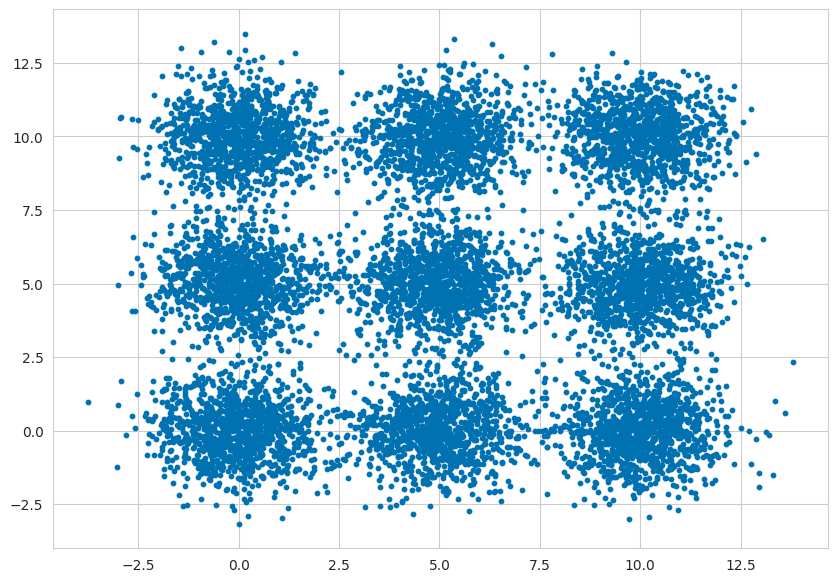

In [65]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.savefig('blob_sep_5.png', format='png', dpi=300)


In [20]:
X,y=make_moons(n_samples=1000, noise=0.1, random_state=0)

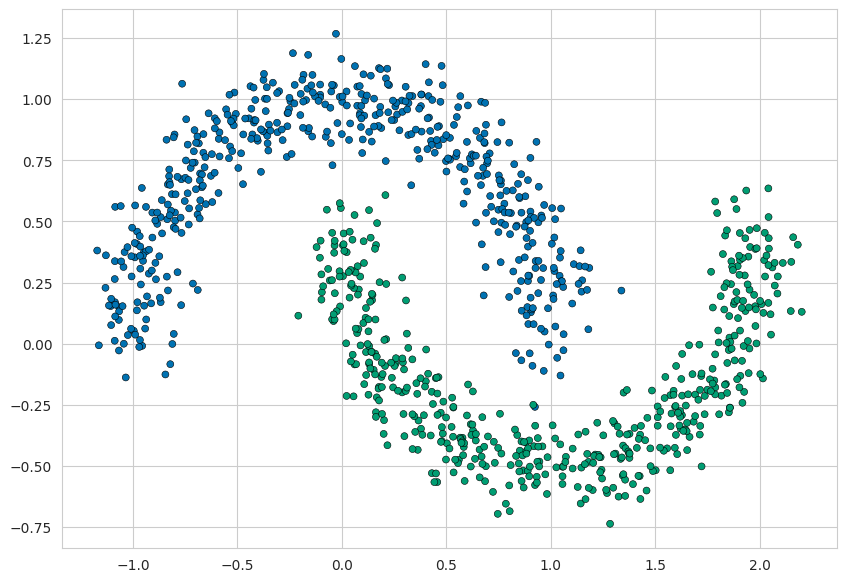

In [21]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
)
plt.savefig('two_moons_01.png', format='png', dpi=300)

plt.show()


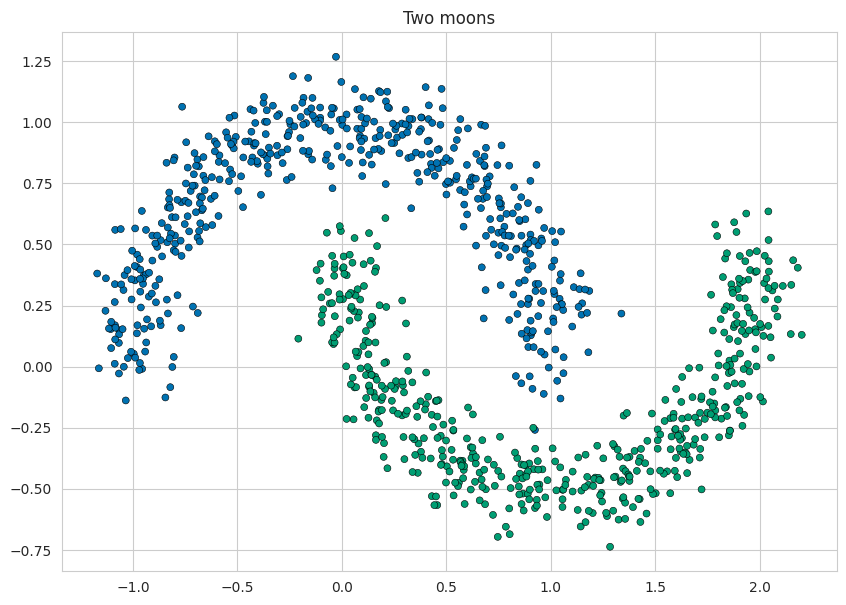

In [40]:
X,y=make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Two moons")
plt.show()


In [66]:
from sklearn.mixture import GaussianMixture
covariances=np.stack([np.eye(2)]*9)
weights = [0.5]*9
means = np.stack([np.array([5*i,5*j]) for i in range(3) for j in range(3)])
gmm = GaussianMixture(n_components=9)

In [67]:
gmm.weights_ = weights
gmm.covariances_ = covariances
gmm.means_ = means
from sklearn.mixture._gaussian_mixture import _compute_precision_cholesky
gmm.precisions_cholesky_ = _compute_precision_cholesky(covariances, "full")
gmm.precisions_ = gmm.precisions_cholesky_ ** 2

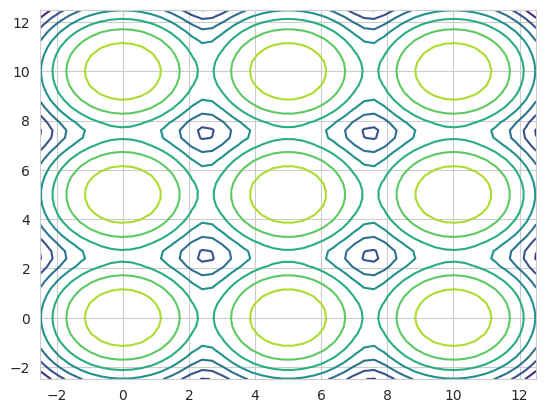

In [69]:
X, Y = np.meshgrid(np.linspace(-2.5, 12.5), np.linspace(-2.5, 12.5))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z, cmap='viridis')